In [115]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

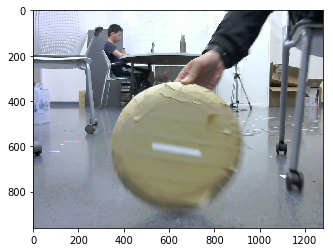

In [28]:
img = cv2.imread('./data/center_away/run_50.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [108]:
def basic_transform(img):
    lower_brown = (136, 133, 101)
    upper_brown = (186, 182, 138)
    mask = cv2.inRange(img, lower_brown, upper_brown)
    result = cv2.bitwise_and(img, img, mask=mask)
    return result

def edge_transform(img):
    # background to black
#     thresh, ret = cv2.threshold(img,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    thresh, ret = cv2.threshold(img,165, 255, cv2.THRESH_BINARY_INV)
    # get edges
    canny = cv2.Canny(ret, 60, 180)
    # make them thicker
    kernel = np.ones((3,3),np.uint8)
    canny = cv2.morphologyEx(canny, cv2.MORPH_DILATE, kernel)
    # apply edges as border in the image
    img[canny==255] = 0

    # same as before
    amount, labels = cv2.connectedComponents(img)
    preview = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
#     print (amount)

    # color them randomly
    for i in range(1, amount):
        preview[labels == i] = np.random.randint(0,255, size=3, dtype=np.uint8)

    return preview



In [147]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
 
    # return the histogram
    return hist

def k_means_segmentation(img, num_clusters):
    image = img.reshape((img.shape[0] * img.shape[1], 3))
    clt = KMeans(n_clusters = num_clusters)
    clt.fit(image)
    
    # build a histogram of clusters and then create a figure
    # representing the number of pixels labeled to each color
#     print(clt.cluster_centers_)
    hist = centroid_histogram(clt)
    color = list([np.random.choice(range(256), size=3) for i in range(num_clusters)])
    clustered_img = np.empty_like(img)
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            rgb = img[r][c]
            rgb = np.tile(rgb, (num_clusters, 1))
            best_cluster = clt.labels_[r * img.shape[1] + c]
            clustered_img[r][c] = color[best_cluster]
    
    # show our color bart
    plt.figure()
    plt.axis("off")
    plt.imshow(clustered_img)
    plt.show()


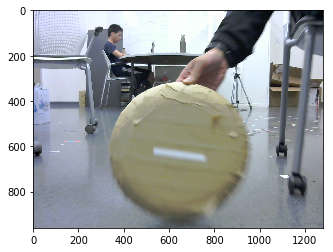

In [157]:
img = cv2.imread("./data/center_away/run_49.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# transform = edge_transform(img)
plt.imshow(img)

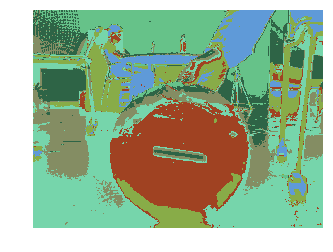

In [158]:
k_means_segmentation(img, 7)

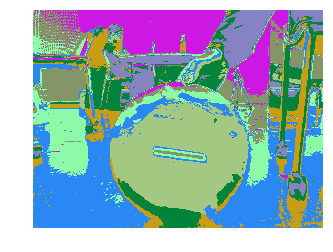

In [159]:
k_means_segmentation(img, 8)